###  GELDIUM DELINQUENCY PREDICTION

In [95]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load Dataset
df=pd.read_csv("Delinquency_prediction_dataset.csv")
df

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [3]:
print(df)

    Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0      CUST0001   56  165580.0         398.0            0.390502   
1      CUST0002   69  100999.0         493.0            0.312444   
2      CUST0003   46  188416.0         500.0            0.359930   
3      CUST0004   32  101672.0         413.0            0.371400   
4      CUST0005   60   38524.0         487.0            0.234716   
..          ...  ...       ...           ...                 ...   
495    CUST0496   71   48307.0         688.0            0.486522   
496    CUST0497   60   86180.0         836.0            0.608174   
497    CUST0498   54  152326.0         847.0            0.676950   
498    CUST0499   50  105852.0         343.0            0.700643   
499    CUST0500   25   40945.0         442.0            0.911370   

     Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                  3                   0       16310.0              0.317396   
1                  6   

In [4]:
# Display basic information
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [5]:
# Show first few rows
print(df.head())



  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0               EMP              18          Student  Los

In [6]:
df.shape

(500, 19)

In [7]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


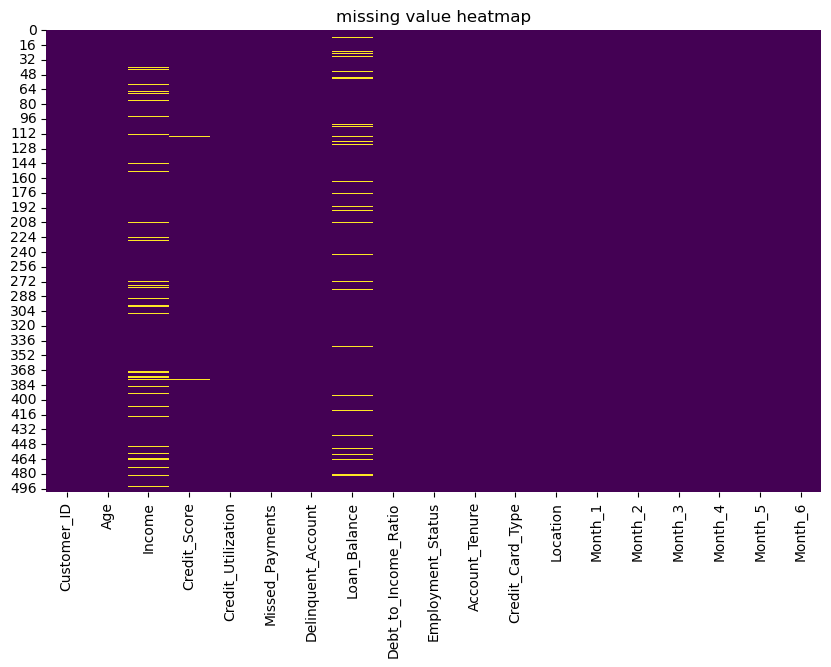

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("missing value heatmap")
plt.show()

In [9]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    return outliers


In [10]:
# Outliers in Income
outliers_income = find_outliers_iqr(df, "Income")
print(f"\nOutliers in Income: {outliers_income.shape[0]} rows")

# Outliers in Credit Utilization (manually checking > 1.0)
outliers_credit_util = df[df["Credit_Utilization"] > 1]
print(f"\nUnrealistic Credit Utilization (>1.0): {outliers_credit_util.shape[0]} rows")
print(outliers_credit_util)

# Outliers in Debt-to-Income Ratio
outliers_dti = find_outliers_iqr(df, "Debt_to_Income_Ratio")
print(f"\nOutliers in Debt-to-Income Ratio: {outliers_dti.shape[0]} rows")



Outliers in Income: 0 rows

Unrealistic Credit Utilization (>1.0): 4 rows
    Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
89     CUST0090   65  127856.0         361.0            1.025843   
265    CUST0266   72   16062.0         584.0            1.025017   
292    CUST0293   49   38061.0         316.0            1.002482   
426    CUST0427   49  163216.0         768.0            1.008734   

     Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
89                 2                   0        2200.0              0.346267   
265                1                   0       92285.0              0.240017   
292                1                   0       95267.0              0.448824   
426                6                   0       60530.0              0.452937   

    Employment_Status  Account_Tenure Credit_Card_Type  Location  Month_1  \
89                EMP              14         Standard   Chicago  On-time   
265        Unemployed        

In [11]:
#Correlation with Target
# ---------------------------
print("\nCorrelation with Delinquent_Account:")
correlations =df.corr(numeric_only=True)["Delinquent_Account"].sort_values(ascending=False)
print(correlations)



Correlation with Delinquent_Account:
Delinquent_Account      1.000000
Income                  0.045409
Credit_Score            0.034833
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Loan_Balance           -0.004320
Missed_Payments        -0.026478
Account_Tenure         -0.039829
Name: Delinquent_Account, dtype: float64


In [12]:
#Summary
# ---------------------------
print("\n--- Summary ---")
print("Missing columns: Income, Credit_Score, Loan_Balance")
print("Anomalies found in Credit_Utilization (>1.0)")
print("Top correlated features (weak correlations):")
print(correlations.head(5))


--- Summary ---
Missing columns: Income, Credit_Score, Loan_Balance
Anomalies found in Credit_Utilization (>1.0)
Top correlated features (weak correlations):
Delinquent_Account      1.000000
Income                  0.045409
Credit_Score            0.034833
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Name: Delinquent_Account, dtype: float64


In [13]:
df['Income'].fillna(df['Income'].median(),inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].mean(),inplace=True)

In [14]:
loan_mean=df["Loan_Balance"].mean()
loan_std=df["Loan_Balance"].std()

np.random.seed(42)  # For reproducibility
synthetic_loan_values=np.random.normal(loc=loan_mean,scale=loan_std,size=df["Loan_Balance"].isnull().sum())



In [15]:
# Apply synthetic values to missing rows
df.loc[df["Loan_Balance"].isnull(),"Loan_Balance_imputed"]=synthetic_loan_values
df.loc[df["Loan_Balance"].notnull(),"Loan_Balance_imputed"]=df["Loan_Balance"]
df["Loan_Balance"]=df["Loan_Balance_imputed"]
df.drop(columns=["Loan_Balance_imputed"],inplace=True)

In [16]:
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64


In [17]:
df.shape

(500, 19)

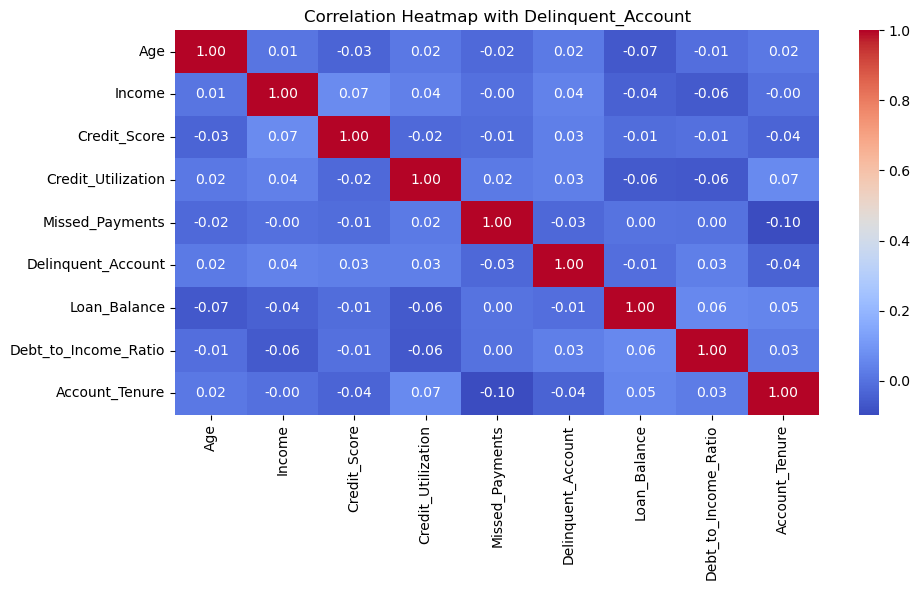

In [18]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target=correlation_matrix["Delinquent_Account"].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Delinquent_Account")
plt.tight_layout()
plt.show()


In [19]:
print("Top Risk Indicators (Correlation with Delinquent_Account):")
print(correlation_with_target)

Top Risk Indicators (Correlation with Delinquent_Account):
Delinquent_Account      1.000000
Income                  0.043991
Credit_Score            0.034820
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Loan_Balance           -0.009730
Missed_Payments        -0.026478
Account_Tenure         -0.039829
Name: Delinquent_Account, dtype: float64


In [20]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.266000,108323.586000,577.716867,0.491446,2.968000,0.160000,48339.737118,0.298862,9.740000
std,16.187629,51523.389667,168.542432,0.197103,1.946935,0.366973,29260.026806,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,-7587.471871,0.100000,0.000000
25%,33.000000,67610.500000,418.750000,0.356486,1.000000,0.000000,23732.250000,0.233639,5.000000
50%,46.500000,107658.000000,584.000000,0.485636,3.000000,0.000000,45342.000000,0.301634,10.000000
75%,59.250000,152572.250000,725.750000,0.634440,5.000000,0.000000,74410.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [21]:
features=["Income", "Credit_Score", "Debt_to_Income_Ratio", "Credit_Utilization", "Missed_Payments"]
target= ["Delinquent_Account"]


In [22]:
# Apply outlier removal
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [23]:
# Apply outlier removal
df_cleaned = remove_outliers(df,features)

# Show new shape after outlier removal
print("\nDataset shape after outlier removal:", df_cleaned.shape)
df_cleaned.describe()



Dataset shape after outlier removal: (500, 19)


,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.266000,108323.586000,577.716867,0.491446,2.968000,0.160000,48339.737118,0.298862,9.740000
std,16.187629,51523.389667,168.542432,0.197103,1.946935,0.366973,29260.026806,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,-7587.471871,0.100000,0.000000
25%,33.000000,67610.500000,418.750000,0.356486,1.000000,0.000000,23732.250000,0.233639,5.000000
50%,46.500000,107658.000000,584.000000,0.485636,3.000000,0.000000,45342.000000,0.301634,10.000000
75%,59.250000,152572.250000,725.750000,0.634440,5.000000,0.000000,74410.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


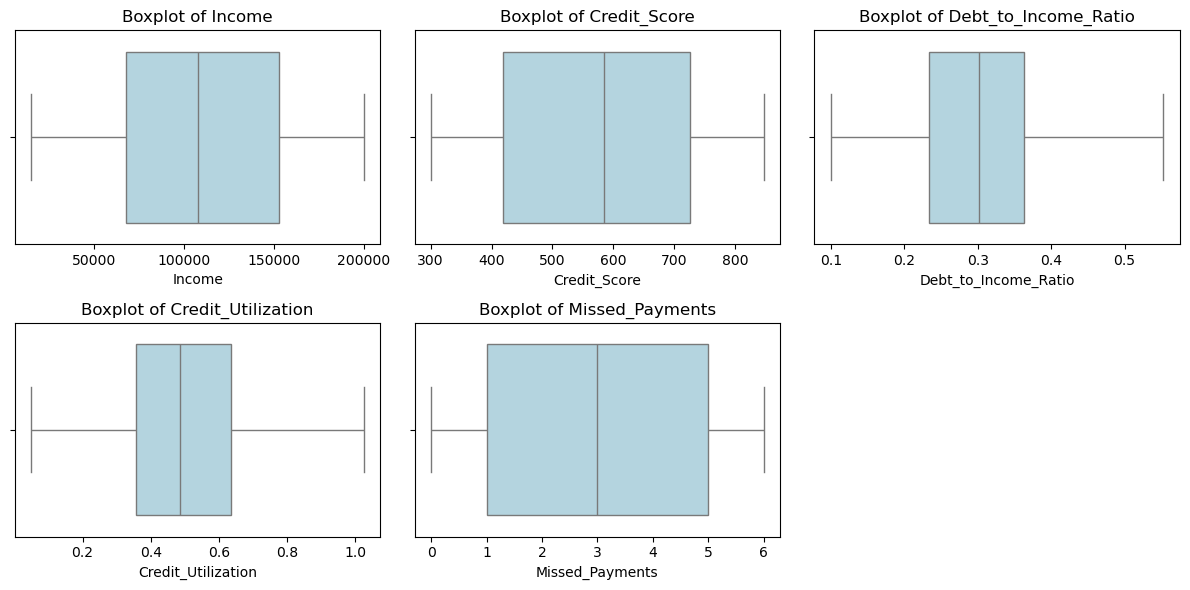

In [24]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color="lightblue")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [25]:
X = df[features]
y = df[target]



In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Train Logistic Regression


model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
log_preds =model.predict(X_test_scaled)
logistic_acc =model.score(X_test_scaled,y_test)
print(f"Logistic Regression Accuracy: {logistic_acc:.4f}")

Logistic Regression Accuracy: 0.8600


In [73]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))


=== Logistic Regression ===
Accuracy: 0.86
Confusion Matrix:
 [[86  0]
 [14  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100



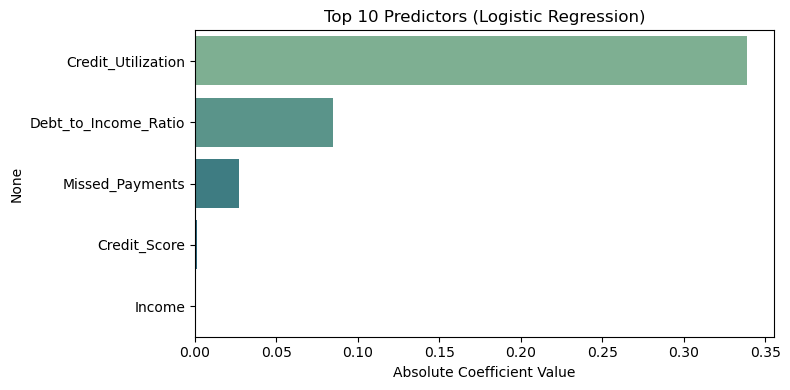

In [75]:
# Get feature importance from coefficients
log_importance = pd.Series(model.coef_[0], index=X_train.columns)
log_top_features = log_importance.abs().sort_values(ascending=False).head(10)

# Plot top features from logistic regression
plt.figure(figsize=(8, 4))
sns.barplot(x=log_top_features.values, y=log_top_features.index, palette='crest')
plt.title('Top 10 Predictors (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

In [30]:
# Train Random Forest Model
optimized_rf_model=RandomForestClassifier(class_weight='balanced',n_estimators=350,max_depth=5,random_state=42)
optimized_rf_model.fit(X_train_scaled,y_train)
rf_preds=optimized_rf_model.predict(X_test)


In [77]:
# Evaluate Random Forest
print("\n=== Random Forest ===")
print("Accuracy:",accuracy_score(y_test,rf_preds))
print("Confusion Matrix:\n",confusion_matrix(y_test,rf_preds))
print("Classification Report:\n",classification_report(y_test,rf_preds))


=== Random Forest ===
Accuracy: 0.72
Confusion Matrix:
 [[67 19]
 [ 9  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83        86
           1       0.21      0.36      0.26        14

    accuracy                           0.72       100
   macro avg       0.54      0.57      0.55       100
weighted avg       0.79      0.72      0.75       100



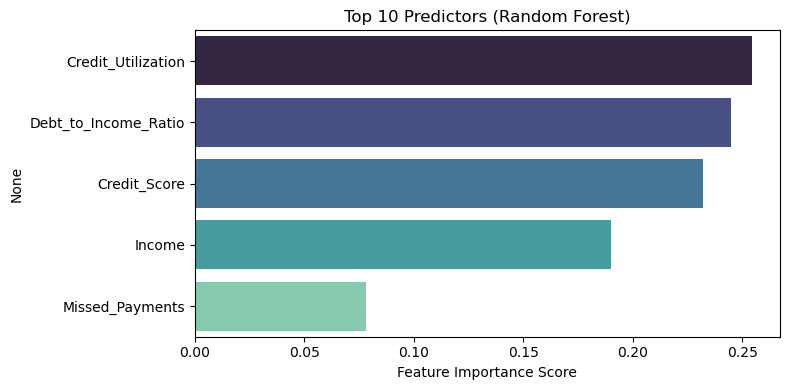

In [79]:
# Get feature importance from random forest
rf_importance = pd.Series(optimized_rf_model.feature_importances_,index=X_train.columns)
rf_top_features = rf_importance.sort_values(ascending=False).head(10)

# Plot top features from random forest
plt.figure(figsize=(8, 4))
sns.barplot(x=rf_top_features.values, y=rf_top_features.index, palette='mako')
plt.title('Top 10 Predictors (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

In [32]:
confusion_matrix(y_test, rf_preds)

array([[67, 19],
       [ 9,  5]], dtype=int64)

In [33]:
df['Delinquent_Account'].value_counts(normalize=True)

Delinquent_Account
0    0.84
1    0.16
Name: proportion, dtype: float64

In [34]:
from sklearn.metrics import roc_auc_score

log_proba =model.predict_proba(X_test_scaled)[:, 1]
rf_proba = optimized_rf_model.predict_proba(X_test)[:, 1]

print("Logistic Regression AUC:",roc_auc_score(y_test,log_proba))
print("Random Forest AUC:",roc_auc_score(y_test,rf_proba))

Logistic Regression AUC: 0.4476744186046512
Random Forest AUC: 0.4784053156146179


In [81]:
# Set threshold for high credit utilization (e.g., >30%)
high_util_threshold = 0.3

# Identify high credit utilization customers
high_util_customers = df[df['Credit_Utilization'] > high_util_threshold]

# Count and display result
print(f"Total high utilization customers: {len(high_util_customers)}")
print(f"Percentage of total: {(len(high_util_customers) / len(df)) * 100:.2f}%")


Total high utilization customers: 417
Percentage of total: 83.40%


In [83]:
# Check delinquency rate among them
high_util_delinquency_rate = high_util_customers['Delinquent_Account'].mean()
print(f"Delinquency rate among high utilization customers: {high_util_delinquency_rate:.2f}")

# Optional: simulate improvement scenario by reducing delinquency by 15%
improved_rate = high_util_delinquency_rate * 0.85
print(f"Targeted reduction goal (15% lower): {improved_rate:.2f}")

Delinquency rate among high utilization customers: 0.17
Targeted reduction goal (15% lower): 0.14


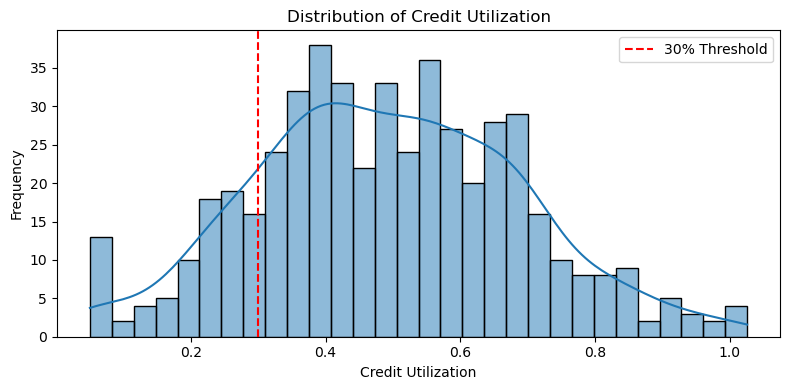

In [85]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Credit_Utilization', bins=30, kde=True)
plt.axvline(high_util_threshold, color='red', linestyle='--', label='30% Threshold')
plt.title('Distribution of Credit Utilization')
plt.xlabel('Credit Utilization')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
# Bias check across income segments
df['Income_Group'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

bias_check = df.groupby('Income_Group')['Delinquent_Account'].mean()
print("Delinquency Rate by Income Group:")
print(bias_check)

Delinquency Rate by Income Group:
Income_Group
Low         0.144000
Mid-Low     0.156463
Mid-High    0.194175
High        0.152000
Name: Delinquent_Account, dtype: float64


In [93]:
import joblib  # Recommended for sklearn models
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']